In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [3]:
base_dir = '/content/drive/MyDrive/Thesis_Paper/CNN/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

In [4]:
BATCH_SIZE = 5
IMG_SIZE = (299, 299)

train = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 400 files belonging to 2 classes.


In [5]:
validation = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 100 files belonging to 2 classes.


In [11]:
Xception_model = Sequential()

pretrained_model= tf.keras.applications.xception.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(299, 299, 3),
    pooling='avg',
    classes=2,
    classifier_activation='sigmoid'
)
for layer in pretrained_model.layers:
        layer.trainable=False

Xception_model.add(pretrained_model)

In [12]:
Xception_model.add(tf.keras.layers.Flatten())
Xception_model.add(tf.keras.layers.Dense(512, activation='relu'))
Xception_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [13]:
Xception_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 21,911,081
Trainable params: 1,049,601
Non-trainable params: 20,861,480
_________________________________________________________________


In [15]:
Xception_model.compile(tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = Xception_model.fit(train, validation_data=validation, epochs=50)

Epoch 1/50
80/80 [==============================] - 256s 3s/step - loss: 21.1129 - accuracy: 0.5725 - val_loss: 5.6114 - val_accuracy: 0.7100
Epoch 2/50
80/80 [==============================] - 8s 91ms/step - loss: 3.8580 - accuracy: 0.7050 - val_loss: 3.7836 - val_accuracy: 0.6800
Epoch 3/50
80/80 [==============================] - 8s 92ms/step - loss: 3.5100 - accuracy: 0.6975 - val_loss: 6.3133 - val_accuracy: 0.6200
Epoch 4/50
80/80 [==============================] - 8s 91ms/step - loss: 3.4175 - accuracy: 0.7350 - val_loss: 7.0109 - val_accuracy: 0.6700
Epoch 5/50
80/80 [==============================] - 8s 92ms/step - loss: 5.3063 - accuracy: 0.6800 - val_loss: 2.8342 - val_accuracy: 0.6600
Epoch 6/50
80/80 [==============================] - 8s 92ms/step - loss: 1.5236 - accuracy: 0.7750 - val_loss: 1.6954 - val_accuracy: 0.7600
Epoch 7/50
80/80 [==============================] - 8s 92ms/step - loss: 1.2081 - accuracy: 0.7925 - val_loss: 2.7467 - val_accuracy: 0.6500
Epoch 8/50
8

In [18]:
loss, accuracy = Xception_model.evaluate(validation)
print('Test accuracy :', accuracy)

20/20 [==============================] - 2s 59ms/step - loss: 0.7302 - accuracy: 0.7800
Test accuracy : 0.7799999713897705


Text(0.5, 1.0, 'Training and Validation Accuracy (Xception)')

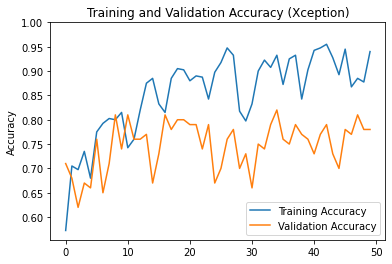

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy (Xception)')

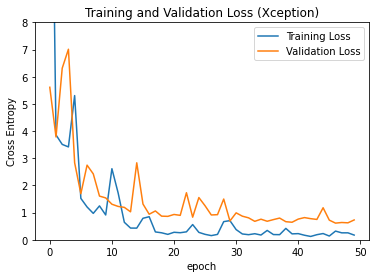

In [25]:
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,8.0])
plt.title('Training and Validation Loss (Xception)')
plt.xlabel('epoch')
plt.show()